## Questionamentos a serem levantados (1 etapa)

ordenamento de dataset e importante para analise?

Quais as hipoteses possiveis?

Quais as colunas sao desnecessarias?

Tratamento de outliers e valores NaN


#### Agrupar os bairros pela zona do SP. (criar nova coluna)

Centro Ampliado-  Sé, Bela Vista, Bom Retiro, 
Cambuci, Consolação, Liberdade, República , Santa Cecília, Pinheiros, Alto de Pinheiros, Itaim 
Bibi, Jardim Paulista, Lapa, Perdizes, Vila Leopoldina, 
Jaguaré, Jaguara, Barra Funda, Butantã, Morumbi, Raposo 
Tavares, Rio Pequeno, Vila Sônia, Vila Mariana, Saúde, Moema, 
Ipiranga, Cursino, Sacomã, Jabaquara, Campo Belo.

Sul -  Cidade Ademar, Pedreira, Campo Limpo, 
Capão Redondo, Vila Andrade, Jardim Ângela, Jardim São Luís, 
Socorro, Cidade Dutra, Grajaú, Parelheiros, Marsilac , Santo 
Amaro e Campo Grande.

Norte - Tremembé, Jaçanã, Vila Maria, Vila 
Guilherme, Vila Medeiros, Santana, Tucuruvi, Mandaqui, Casa 
Verde, Limão, Cachoeirinha, Freguesia do Ó, Brasilândia, 
Pirituba, Jaraguá, São Domingos, Perus e Anhanguera.

Leste 1 -  Mooca, Água Rasa, Belém, Brás, Pari, 
Tatuapé, Vila Prudente, Sapopemba, São Lucas, Aricanduva, 
Carrão, Vila Formosa, Penha, Artur Alvim, Cangaíba e Vila 
Matilde.

Leste 2 -  Ermelino Matarazzo, Ponte Rasa, 
Itaquera, Cidade Líder, José Bonifácio, Parque do Carmo, São 
Mateus, Iguatemi, São Rafael, São Miguel, Jardim Helena, Vila 
Jacuí, Itaim Paulista, Vila Curuçá, Guaianases, Lajeado e Cidade 
Tiradentes.



1 hipotese: A localizacao importa para o aluguel a m^2 or valor total a m^2.  
e se sim, qual e a variacao. listar de ordem decrescente e criar o grafico para visualizacao

2 hipotese: O tipo de imovel influencia no valor total a m^2  (restringir/limitar pela zona). 

3 hipotese: Que tipo de imovel esta mais concentrado em cada zona. Centro possui mais apartamentos. 


In [92]:
import pandas as pd
import numpy as np

In [93]:
data=pd.read_csv("data.csv")
data.head(5)


,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [94]:
bairros= data['district'].unique()
#pd.set_option('display.max_unique', None)
print(bairros)
print(len(bairros))


['Belenzinho' 'Vila Marieta' 'Pinheiros' ... 'Vila Elvira'
 'Jardim Vitoria Regia' 'Retiro Morumbi']
1199


### Separando os bairros por região

In [95]:
# Criar um novo DataFrame com a coluna 'diferentes' contendo os valores únicos
df_valores_unicos = pd.DataFrame({'diferentes': bairros})

# Exportar os valores únicos para um arquivo XLSX usando a biblioteca xlsxwriter
writer = pd.ExcelWriter('valores_unicos.xlsx', engine='xlsxwriter')
df_valores_unicos.to_excel(writer, sheet_name='Sheet1', index=False)
writer.close()


In [96]:
# Convertendo a coluna "district" em letras minusculas
data['district']=data['district'].str.lower()
data.head(5)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,vila marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,vila ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,bela vista,19,1,0,Studio e kitnet,4000,4654


In [97]:
# Tirar a coluna "address"
data=data.drop('address', axis=1)
data.head(5)

,district,area,bedrooms,garage,type,rent,total
0,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,vila marieta,15,1,1,Studio e kitnet,1030,1345
2,pinheiros,18,1,0,Apartamento,4000,4661
3,vila ré,56,2,2,Casa em condomínio,1750,1954
4,bela vista,19,1,0,Studio e kitnet,4000,4654


In [98]:
# Remover os acentos
from unidecode import unidecode
data["district"]=data['district'].apply(unidecode)
data.head(10)

,district,area,bedrooms,garage,type,rent,total
0,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,vila marieta,15,1,1,Studio e kitnet,1030,1345
2,pinheiros,18,1,0,Apartamento,4000,4661
3,vila re,56,2,2,Casa em condomínio,1750,1954
4,bela vista,19,1,0,Studio e kitnet,4000,4654
5,bras,50,2,1,Apartamento,3800,4587
6,brooklin paulista,72,2,1,Apartamento,3500,5187
7,centro,26,1,0,Studio e kitnet,1727,2244
8,piqueri,32,2,0,Apartamento,1200,1592
9,vila aricanduva,36,1,0,Apartamento,1200,1501


In [99]:
# Remover os pontos que estão no final da coluna 'district'
data['district'] = data['district'].str.rstrip('.')
data.head(10)

,district,area,bedrooms,garage,type,rent,total
0,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,vila marieta,15,1,1,Studio e kitnet,1030,1345
2,pinheiros,18,1,0,Apartamento,4000,4661
3,vila re,56,2,2,Casa em condomínio,1750,1954
4,bela vista,19,1,0,Studio e kitnet,4000,4654
5,bras,50,2,1,Apartamento,3800,4587
6,brooklin paulista,72,2,1,Apartamento,3500,5187
7,centro,26,1,0,Studio e kitnet,1727,2244
8,piqueri,32,2,0,Apartamento,1200,1592
9,vila aricanduva,36,1,0,Apartamento,1200,1501


In [100]:
# Remover todos os espaços entre palavras na coluna 'coluna'
data['district'] = data['district'].str.replace(r'\s+', '', regex=True)
data.head(10)

,district,area,bedrooms,garage,type,rent,total
0,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,vilamarieta,15,1,1,Studio e kitnet,1030,1345
2,pinheiros,18,1,0,Apartamento,4000,4661
3,vilare,56,2,2,Casa em condomínio,1750,1954
4,belavista,19,1,0,Studio e kitnet,4000,4654
5,bras,50,2,1,Apartamento,3800,4587
6,brooklinpaulista,72,2,1,Apartamento,3500,5187
7,centro,26,1,0,Studio e kitnet,1727,2244
8,piqueri,32,2,0,Apartamento,1200,1592
9,vilaaricanduva,36,1,0,Apartamento,1200,1501


In [101]:
# Remover os valores entre parênteses na coluna 'coluna'
data['district'] = data['district'].str.replace(r'\(.*\)', '', regex=True)
data.head(35)

,district,area,bedrooms,garage,type,rent,total
0,belenzinho,21,1,0,Studio e kitnet,2400,2939
1,vilamarieta,15,1,1,Studio e kitnet,1030,1345
2,pinheiros,18,1,0,Apartamento,4000,4661
3,vilare,56,2,2,Casa em condomínio,1750,1954
4,belavista,19,1,0,Studio e kitnet,4000,4654
5,bras,50,2,1,Apartamento,3800,4587
6,brooklinpaulista,72,2,1,Apartamento,3500,5187
7,centro,26,1,0,Studio e kitnet,1727,2244
8,piqueri,32,2,0,Apartamento,1200,1592
9,vilaaricanduva,36,1,0,Apartamento,1200,1501


In [102]:
bairros1= data['district'].unique()
#pd.set_option('display.max_unique', None)
print(bairros1)
print(len(bairros1))

['belenzinho' 'vilamarieta' 'pinheiros' ... 'parquedomorumbi' 'vilaelvira'
 'retiromorumbi']
1049


In [103]:
# Os dados uniformiazado
diferenca=len(bairros)-len(bairros1)
print(f"{diferenca} foram uniformizados na coluna district.")

150 foram uniformizados na coluna district.


In [104]:
# Ler a planilha Excel com os dados de mapeamento
mapeamento_df = pd.read_excel('mapeamento_zonas.xlsx')

# Criar um dicionário de mapeamento a partir do DataFrame
mapeamento_zonas = dict(zip(mapeamento_df['Variavel'], mapeamento_df['Zona']))

# Aplicar o mapeamento apenas para as variáveis mapeadas
data['Zona'] = data['district'].map(mapeamento_zonas)

# Mostrar o DataFrame com a nova coluna 'Zona'
data.head(20)




,district,area,bedrooms,garage,type,rent,total,Zona
0,belenzinho,21,1,0,Studio e kitnet,2400,2939,Leste 1
1,vilamarieta,15,1,1,Studio e kitnet,1030,1345,Leste 1
2,pinheiros,18,1,0,Apartamento,4000,4661,Centro Ampliado
3,vilare,56,2,2,Casa em condomínio,1750,1954,Leste 1
4,belavista,19,1,0,Studio e kitnet,4000,4654,Centro Ampliado
5,bras,50,2,1,Apartamento,3800,4587,Leste 1
6,brooklinpaulista,72,2,1,Apartamento,3500,5187,Centro Ampliado
7,centro,26,1,0,Studio e kitnet,1727,2244,Centro Ampliado
8,piqueri,32,2,0,Apartamento,1200,1592,Centro Ampliado
9,vilaaricanduva,36,1,0,Apartamento,1200,1501,Leste 1


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  11657 non-null  object
 1   area      11657 non-null  int64 
 2   bedrooms  11657 non-null  int64 
 3   garage    11657 non-null  int64 
 4   type      11657 non-null  object
 5   rent      11657 non-null  int64 
 6   total     11657 non-null  int64 
 7   Zona      8670 non-null   object
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [106]:
# Verificar se existe dados vazios
data.isnull().sum()


district       0
area           0
bedrooms       0
garage         0
type           0
rent           0
total          0
Zona        2987
dtype: int64

In [107]:
# Eliminar os dados NaN na coluna Zona
data = data.dropna(subset=['Zona'])
data.isnull().sum()

district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
Zona        0
dtype: int64

In [108]:
# Eliminar a coluna district
data=data.drop('district', axis=1)
data.head(5)

,area,bedrooms,garage,type,rent,total,Zona
0,21,1,0,Studio e kitnet,2400,2939,Leste 1
1,15,1,1,Studio e kitnet,1030,1345,Leste 1
2,18,1,0,Apartamento,4000,4661,Centro Ampliado
3,56,2,2,Casa em condomínio,1750,1954,Leste 1
4,19,1,0,Studio e kitnet,4000,4654,Centro Ampliado


## Verificando a existencia de outliers

In [109]:
data.describe()

,area,bedrooms,garage,rent,total
count,8670.000000,8670.000000,8670.000000,8670.000000,8670.000000
mean,83.305652,1.925721,1.017993,3437.047866,4363.935755
std,72.916329,0.939769,1.109070,2728.816969,3486.938917
min,0.000000,0.000000,0.000000,500.000000,521.000000
25%,40.000000,1.000000,0.000000,1700.000000,2181.250000
50%,60.000000,2.000000,1.000000,2560.000000,3298.000000
75%,96.000000,3.000000,1.000000,4000.000000,5139.000000
max,570.000000,6.000000,6.000000,25000.000000,28700.000000


<Axes: >

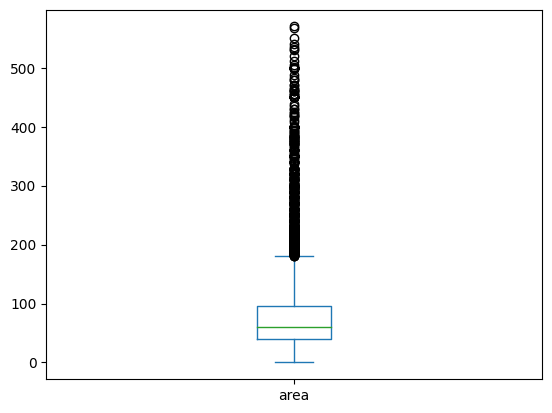

In [110]:
# Na coluna area
data.area.plot.box()

In [111]:
data= data.sort_values(by='area')
print(data.head(20))

       area  bedrooms  garage             type  rent  total             Zona
7085      0         3       2             Casa  3200   3351  Centro Ampliado
2983      0         2       1      Apartamento  1600   2569            Norte
962       1         1       1  Studio e kitnet  2490   2987  Centro Ampliado
1223      5         1       0             Casa   570    594            Norte
4735     10         1       0      Apartamento  1400   1454          Leste 1
7582     10         1       0  Studio e kitnet   840    872  Centro Ampliado
2636     10         1       0  Studio e kitnet  1720   2136  Centro Ampliado
8856     10         1       0  Studio e kitnet  1450   1506          Leste 1
5959     11         1       0  Studio e kitnet  2300   2651  Centro Ampliado
4683     11         1       0  Studio e kitnet   600    918              Sul
3403     11         1       0  Studio e kitnet  2125   2506  Centro Ampliado
8470     11         1       0      Apartamento  2400   3000  Centro Ampliado

In [112]:
# Nao fazem sentido ter um imovel com area 0 , 1 ,2 5 m^2
#Remover as primieras 7 linhas
data.drop(index=data.index[:4], inplace=True)
data.head()


,area,bedrooms,garage,type,rent,total,Zona
4735,10,1,0,Apartamento,1400,1454,Leste 1
7582,10,1,0,Studio e kitnet,840,872,Centro Ampliado
2636,10,1,0,Studio e kitnet,1720,2136,Centro Ampliado
8856,10,1,0,Studio e kitnet,1450,1506,Leste 1
5959,11,1,0,Studio e kitnet,2300,2651,Centro Ampliado


<Axes: >

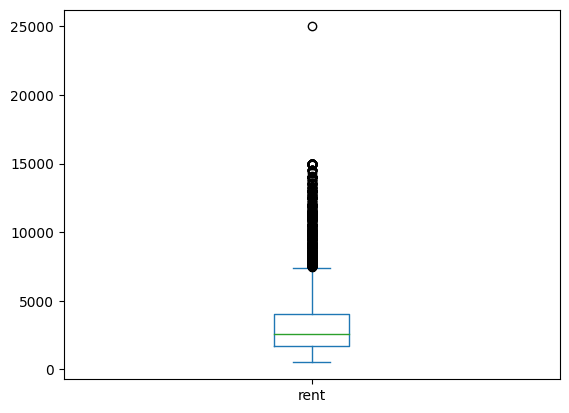

In [113]:
#Na coluna de aluguel

data.rent.plot.box()

In [114]:
# Filitrando esse valor
data= data.sort_values(['rent','total'], ascending=[0,0])
data.head(20)

,area,bedrooms,garage,type,rent,total,Zona
6095,24,1,0,Studio e kitnet,25000,26710,Sul
10144,454,4,5,Apartamento,15000,28700,Sul
9950,329,4,3,Apartamento,15000,26550,Sul
10093,311,4,6,Apartamento,15000,25510,Sul
9951,338,4,3,Apartamento,15000,24540,Sul
9948,329,4,4,Apartamento,15000,24270,Sul
11603,280,4,5,Apartamento,15000,23180,Centro Ampliado
9804,240,3,4,Apartamento,15000,23080,Centro Ampliado
8767,328,4,4,Apartamento,15000,22750,Sul
8765,217,3,5,Apartamento,15000,22640,Sul


In [115]:
# Encontrar o índice da linha que contém o valor máximo na coluna 'rent'
indice_max_rent = data['rent'].idxmax()

# Remover a linha que contém o valor máximo na coluna 'rent'
data = data.drop(index=indice_max_rent)

data.head(20)

,area,bedrooms,garage,type,rent,total,Zona
10144,454,4,5,Apartamento,15000,28700,Sul
9950,329,4,3,Apartamento,15000,26550,Sul
10093,311,4,6,Apartamento,15000,25510,Sul
9951,338,4,3,Apartamento,15000,24540,Sul
9948,329,4,4,Apartamento,15000,24270,Sul
11603,280,4,5,Apartamento,15000,23180,Centro Ampliado
9804,240,3,4,Apartamento,15000,23080,Centro Ampliado
8767,328,4,4,Apartamento,15000,22750,Sul
8765,217,3,5,Apartamento,15000,22640,Sul
11333,180,3,4,Apartamento,15000,22540,Centro Ampliado


<Axes: >

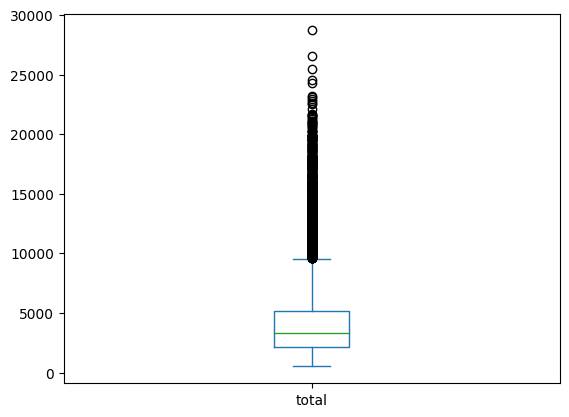

In [116]:
# Na coluna total
data.total.plot.box()

In [117]:
data= data.sort_values(['total','rent'], ascending=[0,0])
data.head(20)

,area,bedrooms,garage,type,rent,total,Zona
10144,454,4,5,Apartamento,15000,28700,Sul
9950,329,4,3,Apartamento,15000,26550,Sul
10093,311,4,6,Apartamento,15000,25510,Sul
9951,338,4,3,Apartamento,15000,24540,Sul
9948,329,4,4,Apartamento,15000,24270,Sul
11603,280,4,5,Apartamento,15000,23180,Centro Ampliado
9804,240,3,4,Apartamento,15000,23080,Centro Ampliado
11178,272,3,5,Apartamento,13600,22990,Centro Ampliado
8767,328,4,4,Apartamento,15000,22750,Sul
8765,217,3,5,Apartamento,15000,22640,Sul


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

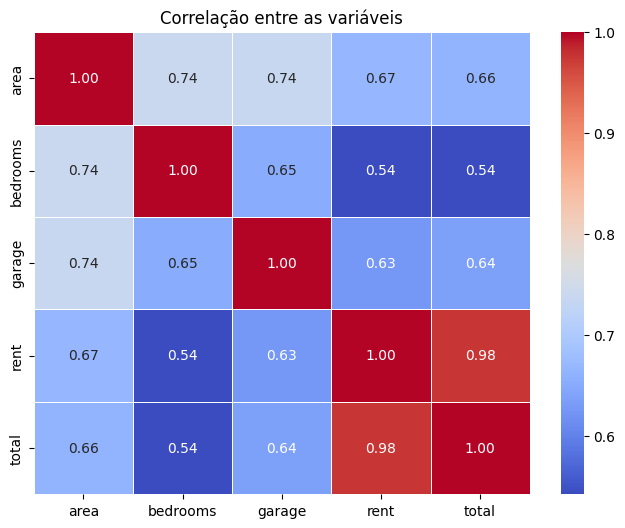

In [119]:
data2=data.drop(['type','Zona'], axis=1)

# Calcular a matriz de correlação
correlation_matrix = data2.corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as variáveis')
plt.show()


## Tratar outliers no caso de multivariaveis.

In [120]:
from pyod.models.knn import KNN
data.head(1)



,area,bedrooms,garage,type,rent,total,Zona
10144,454,4,5,Apartamento,15000,28700,Sul


In [121]:
detector= KNN()
detector.fit(data.iloc[:,[0,1,2,4,5]])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [122]:
previsoes=detector.labels_
previsoes

array([1, 1, 1, ..., 0, 0, 0])

In [123]:
np.unique(previsoes,return_counts=True)

(array([0, 1]), array([7798,  867], dtype=int64))

In [124]:
outliers=[]
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)
print(outliers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 117, 118, 120, 121, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239

In [125]:
lista_outliers=data.iloc[outliers,:]
lista_outliers.head(10)

,area,bedrooms,garage,type,rent,total,Zona
10144,454,4,5,Apartamento,15000,28700,Sul
9950,329,4,3,Apartamento,15000,26550,Sul
10093,311,4,6,Apartamento,15000,25510,Sul
9951,338,4,3,Apartamento,15000,24540,Sul
9948,329,4,4,Apartamento,15000,24270,Sul
11603,280,4,5,Apartamento,15000,23180,Centro Ampliado
9804,240,3,4,Apartamento,15000,23080,Centro Ampliado
11178,272,3,5,Apartamento,13600,22990,Centro Ampliado
8767,328,4,4,Apartamento,15000,22750,Sul
8765,217,3,5,Apartamento,15000,22640,Sul


In [126]:
# Remover as linhas presentes no DataFrame "lista_outliers" do DataFrame "data"
data1 = data.drop(lista_outliers.index)

# Mostrar o DataFrame resultante sem os outliers
data1.head()

,area,bedrooms,garage,type,rent,total,Zona
9801,220,2,3,Apartamento,15000,20810,Centro Ampliado
10085,220,4,3,Apartamento,15000,20780,Sul
11124,240,4,1,Apartamento,15000,19590,Centro Ampliado
10401,314,3,5,Casa em condomínio,15000,19580,Centro Ampliado
6099,167,2,3,Apartamento,15000,19540,Centro Ampliado


In [127]:
# Criando duas colunas no DataFrame
data1['aluguel/area']=round(data1['rent']/ data1['area'],2)
data1['total/area']=round(data1['total']/data1['area'],2)

data1.head(20)

,area,bedrooms,garage,type,rent,total,Zona,aluguel/area,total/area
9801,220,2,3,Apartamento,15000,20810,Centro Ampliado,68.18,94.59
10085,220,4,3,Apartamento,15000,20780,Sul,68.18,94.45
11124,240,4,1,Apartamento,15000,19590,Centro Ampliado,62.50,81.62
10401,314,3,5,Casa em condomínio,15000,19580,Centro Ampliado,47.77,62.36
6099,167,2,3,Apartamento,15000,19540,Centro Ampliado,89.82,117.01
1354,158,3,3,Apartamento,15000,19530,Centro Ampliado,94.94,123.61
11599,232,4,5,Apartamento,15000,19520,Centro Ampliado,64.66,84.14
9343,290,4,5,Apartamento,15000,19500,Sul,51.72,67.24
9351,300,3,3,Apartamento,15000,19490,Sul,50.00,64.97
11132,189,3,1,Apartamento,15000,19440,Centro Ampliado,79.37,102.86


In [128]:
# Eliminar a coluna area
data1=data1.drop(['area','rent','total'], axis=1)
data1.head(5)

,bedrooms,garage,type,Zona,aluguel/area,total/area
9801,2,3,Apartamento,Centro Ampliado,68.18,94.59
10085,4,3,Apartamento,Sul,68.18,94.45
11124,4,1,Apartamento,Centro Ampliado,62.50,81.62
10401,3,5,Casa em condomínio,Centro Ampliado,47.77,62.36
6099,2,3,Apartamento,Centro Ampliado,89.82,117.01


1 hipotese: A localizacao importa para o aluguel a m^2 or valor total a m^2.  

In [129]:
# Analise da primeira hipotese
#Listar de ordem decrescente a coluna "aluguel/area", caso igualar colocar o maior valor da coluna "total/area" em primeiro
data1=data1.sort_values(['aluguel/area','total/area'],ascending=[0,0])
data1.head(50)

,bedrooms,garage,type,Zona,aluguel/area,total/area
8204,1,0,Apartamento,Centro Ampliado,345.45,402.36
5663,1,1,Studio e kitnet,Centro Ampliado,250.00,291.43
7584,1,0,Apartamento,Centro Ampliado,235.00,238.00
307,1,0,Studio e kitnet,Centro Ampliado,231.25,278.69
332,1,0,Studio e kitnet,Centro Ampliado,222.22,264.11
2,1,0,Apartamento,Centro Ampliado,222.22,258.94
8470,1,0,Apartamento,Centro Ampliado,218.18,272.73
1313,1,1,Apartamento,Centro Ampliado,212.77,241.49
10355,1,0,Apartamento,Centro Ampliado,211.54,233.85
5673,1,1,Studio e kitnet,Centro Ampliado,211.11,237.19


In [130]:
#Achar medias do aluguel por metro quadrado da cada zona
aluguel_media_zona=data1.groupby('Zona')['aluguel/area'].mean()
print(aluguel_media_zona)

#Achar medias do total por metro quadrado da cada zona
total_media_zona=data1.groupby('Zona')['total/area'].mean()
print(total_media_zona)

Zona
Centro Ampliado    56.017575
Leste 1            41.712957
Leste 2            33.178193
Norte              34.112153
Sul                42.282196
Name: aluguel/area, dtype: float64
Zona
Centro Ampliado    71.428195
Leste 1            50.569099
Leste 2            38.642048
Norte              41.835429
Sul                53.960192
Name: total/area, dtype: float64


In [131]:
#Criar dataframe para plotar graficos
data_hipotese1= pd.DataFrame({"aluguel_media_zona":aluguel_media_zona, "total_media_zona": total_media_zona})
data_hipotese1.head()

,aluguel_media_zona,total_media_zona
Zona,,
Centro Ampliado,56.017575,71.428195
Leste 1,41.712957,50.569099
Leste 2,33.178193,38.642048
Norte,34.112153,41.835429
Sul,42.282196,53.960192


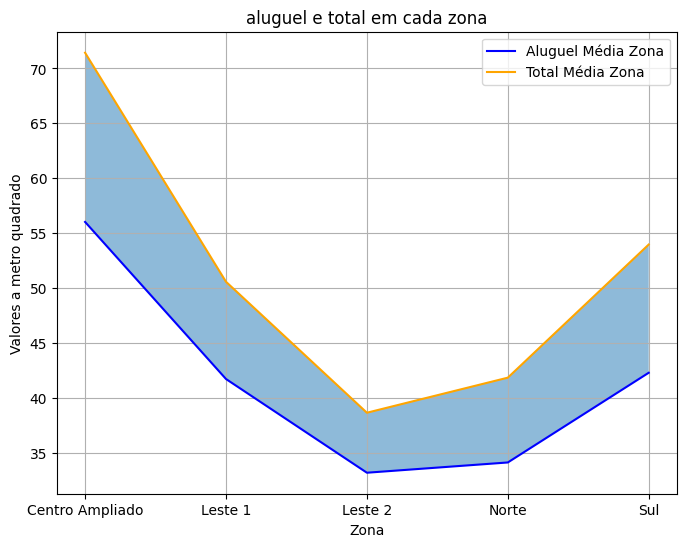

In [132]:
# Plotar o Gráfico de Área
plt.figure(figsize=(8, 6))
plt.plot(data_hipotese1.index, data_hipotese1['aluguel_media_zona'], label='Aluguel Média Zona', color='blue')
plt.plot(data_hipotese1.index, data_hipotese1['total_media_zona'], label='Total Média Zona', color='orange')
plt.fill_between(data_hipotese1.index, data_hipotese1['aluguel_media_zona'], data_hipotese1['total_media_zona'], alpha=0.5)
plt.xlabel('Zona')
plt.ylabel('Valores a metro quadrado')
plt.title('aluguel e total em cada zona')
plt.legend()
plt.grid(True)
plt.show()



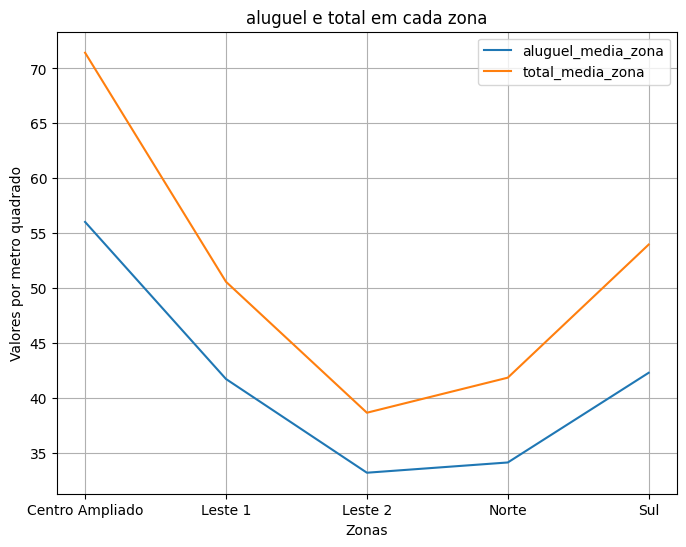

In [133]:
# Plotar as duas linhas no mesmo gráfico
plt.figure(figsize=(8, 6))
plt.plot(data_hipotese1['aluguel_media_zona'], label='aluguel_media_zona')
plt.plot(data_hipotese1['total_media_zona'], label='total_media_zona')
plt.xlabel('Zonas')
plt.ylabel('Valores por metro quadrado')
plt.title('aluguel e total em cada zona')
plt.legend()
plt.grid(True)
plt.show()

# Conclusão

### Hipótese 1

 Em conclusão da primeira hipótese, podemos afirmar que a localização desempenha um papel significativo no valor do aluguel por metro quadrado. Ao longo deste trabalho, analisamos cinco diferentes áreas: Centro Ampliado, Leste 1, Leste 2, Sul e Norte. Observamos que o Centro Ampliado apresenta o maior valor médio de aluguel por metro quadrado, com aproximadamente 56 reais, enquanto o valor mais baixo é encontrado em Leste 2, com aproximadamente 33 reais por metro quadrado.

 É possível que essa grande variação ocorra devido ao Centro Ampliado abrigar bairros nobres e boêmios, como Itaim Bibi, Vila Nova Conceição e Vila Mariana, naturalmente atraindo um público mais abastado, que está disposto a pagar mais por imóveis em regiões privilegiadas com uma infraestrutura de qualidade e fácil acesso a áreas de lazer e entretenimento. Além disso, ser o centro tecnológico e financeiro da cidade confere uma vantagem competitiva ao Centro Ampliado, tornando-o ainda mais atrativo para empresas e profissionais que buscam estar no coração da atividade comercial e empresarial.

 Por outro lado, Leste 2, como uma zona extrema da cidade, pode não oferecer o mesmo nível de infraestrutura e comodidades encontradas no Centro Ampliado. Essa distância em relação ao centro financeiro e tecnológico, aliada a uma possível menor oferta de serviços e conveniências, contribui para que os valores de aluguel por metro quadrado sejam mais baixos nessa região.

 Portanto, fica claro que as propriedades localizadas no Centro Ampliado possuem um acréscimo de 23 reais por metro quadrado em relação a Leste 2, representando uma variação significativa entre as áreas. Essa conclusão ressalta a importância de considerar a localização ao determinar o valor do aluguel por metro quadrado, pois diferentes regiões podem ter demandas e características distintas, que influenciam diretamente nos preços praticados no mercado imobiliário.

2 hipotese: O tipo de imovel influencia no valor total a m^2

In [134]:
aluguel_media_type=data1.groupby('type')['aluguel/area'].mean()
print(aluguel_media_type)


type
Apartamento           49.333173
Casa                  27.576696
Casa em condomínio    33.102538
Studio e kitnet       71.988589
Name: aluguel/area, dtype: float64


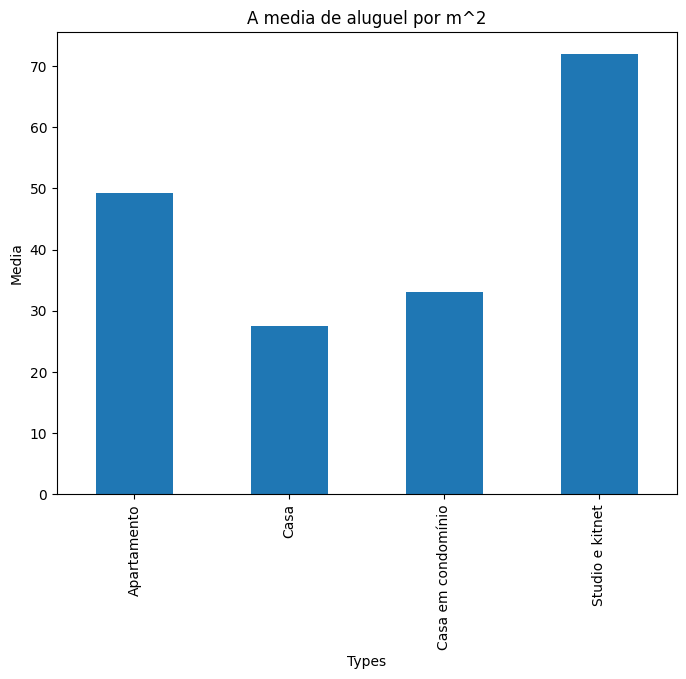

In [135]:
# Plotar o gráfico de barras 
plt.figure(figsize=(8, 6))
media_type.plot(kind='bar')
plt.title('A media de aluguel por m^2')
plt.xlabel('Types')
plt.ylabel('Media')
plt.show()

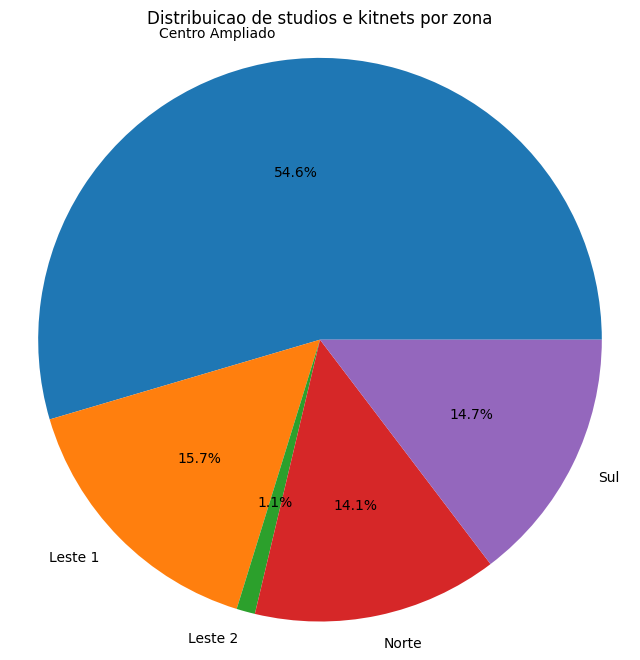

In [136]:
# Fazer o groupby e contar as ocorrências em cada categoria
contagem_por_zona= data1.groupby('Zona').size()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_por_zona, labels=contagem_por_zona.index, autopct='%1.1f%%')
plt.title('Distribuicao de studios e kitnets por zona')
plt.axis('equal')  # Aspecto igual para que o gráfico seja circular
plt.show()

### Hipótese 2

Com base nos dados e análises apresentados, fica evidente que o tipo de imóvel tem um impacto significativo no valor total por metro quadrado, especialmente quando levamos em consideração a localização restrita pela zona. As conclusões obtidas revelam que cada tipo de imóvel possui um valor distinto por metro quadrado, e essa variação pode ser atribuída a diversos fatores.

Entre os tipos de imóveis analisados, os Studios e Kitnets apresentam o maior valor por metro quadrado, mesmo sendo menores em tamanho, devido à sua concentração de 54,6% no Centro Ampliado. Isso sugere que a localização é um fator determinante no preço desses imóveis, visto que o Centro Ampliado é uma área valorizada e atrativa, o que acaba elevando o valor por metro quadrado dessas unidades.

Além da localização, outros fatores como o tamanho do imóvel, o número de cômodos (banheiros, garagem) e a infraestrutura também podem influenciar nos preços. Por exemplo, casas em condomínios podem ter um valor maior devido às comodidades e segurança oferecidas pelo empreendimento, enquanto apartamentos podem se beneficiar de uma maior oferta de serviços e conveniências próximas.

Em suma, este estudo ressalta a importância de considerar tanto o tipo de imóvel quanto a localização ao avaliar o valor total por metro quadrado. Compreender as nuances e fatores que afetam os preços auxilia compradores, vendedores e investidores a tomarem decisões mais embasadas no mercado imobiliário.

3 hipotese: Que tipo de imovel esta mais concentrado em cada zona

In [137]:
# Na zona "centro ampliado"
data_centro=data1.loc[data1["Zona"]=="Centro Ampliado"]

# Fazer o groupby e contar as ocorrências em cada categoria
contagem_centro= data_centro.groupby('type').size()

# Calulando ocorrencia total
total_centro=contagem_centro.sum()

# Dividindo cada valor pelo valor total e criando uma nova série com os valores proporcionais
centro_proporcionais = (contagem_centro / total_centro *100).round(2)
print(centro_proporcionais)

type
Apartamento           65.92
Casa                  12.08
Casa em condomínio     0.75
Studio e kitnet       21.25
dtype: float64


In [138]:
# Na zona "sul"
data_sul=data1.loc[data1["Zona"]=="Sul"]
# Fazer o groupby e contar as ocorrências em cada categoria
contagem_sul=data_sul.groupby('type').size()
print(contagem_sul)

# Calulando ocorrencia total
total_sul=contagem_sul.sum()

# Dividindo cada valor pelo valor total e criando uma nova série com os valores proporcionais
sul_proporcionais = (contagem_sul / total_sul *100).round(2)
print(sul_proporcionais)

type
Apartamento           746
Casa                  292
Casa em condomínio     12
Studio e kitnet        93
dtype: int64
type
Apartamento           65.27
Casa                  25.55
Casa em condomínio     1.05
Studio e kitnet        8.14
dtype: float64


In [139]:
# Na zona "Leste 1"
data_leste1=data1.loc[data1["Zona"]=="Leste 1"]
# Fazer o groupby e contar as ocorrências em cada categoria
contagem_leste1=data_leste1.groupby('type').size()
print(contagem_leste1)

# Calulando ocorrencia total
total_leste1=contagem_leste1.sum()

# Dividindo cada valor pelo valor total e criando uma nova série com os valores proporcionais
leste1_proporcionais = (contagem_leste1 / total_leste1 *100).round(2)
print(leste1_proporcionais)

type
Apartamento           760
Casa                  280
Casa em condomínio     35
Studio e kitnet       146
dtype: int64
type
Apartamento           62.24
Casa                  22.93
Casa em condomínio     2.87
Studio e kitnet       11.96
dtype: float64


In [140]:
# Na zona "Leste 2"
data_leste2=data1.loc[data1["Zona"]=="Leste 2"]
# Fazer o groupby e contar as ocorrências em cada categoria
contagem_leste2=data_leste2.groupby('type').size()
print(contagem_leste2)

# Calulando ocorrencia total
total_leste2=contagem_leste2.sum()

# Dividindo cada valor pelo valor total e criando uma nova série com os valores proporcionais
leste2_proporcionais = (contagem_leste2 / total_leste2 *100).round(2)
print(leste2_proporcionais)

type
Apartamento        49
Casa               23
Studio e kitnet    11
dtype: int64
type
Apartamento        59.04
Casa               27.71
Studio e kitnet    13.25
dtype: float64


In [141]:
# Na zona "Norte"
data_norte=data1.loc[data1["Zona"]=="Norte"]
# Fazer o groupby e contar as ocorrências em cada categoria
contagem_norte=data_norte.groupby('type').size()
print(contagem_norte)

# Calulando ocorrencia total
total_norte=contagem_norte.sum()

# Dividindo cada valor pelo valor total e criando uma nova série com os valores proporcionais
norte_proporcionais = (contagem_norte / total_norte *100).round(2)
print(norte_proporcionais)


type
Apartamento           626
Casa                  368
Casa em condomínio     51
Studio e kitnet        51
dtype: int64
type
Apartamento           57.12
Casa                  33.58
Casa em condomínio     4.65
Studio e kitnet        4.65
dtype: float64


In [142]:
data_hipotese2=pd.DataFrame({"centro":centro_proporcionais,"sul":sul_proporcionais,
                             "leste 1": leste1_proporcionais,"leste 2": leste2_proporcionais, "norte": norte_proporcionais})
data_hipotese2.head()

,centro,sul,leste 1,leste 2,norte
type,,,,,
Apartamento,65.92,65.27,62.24,59.04,57.12
Casa,12.08,25.55,22.93,27.71,33.58
Casa em condomínio,0.75,1.05,2.87,NaN,4.65
Studio e kitnet,21.25,8.14,11.96,13.25,4.65


In [143]:
#Para criar o grafico de barra empilhado primeiro tenho que transpor o dataframe.
data_hipotese2.T

type,Apartamento,Casa,Casa em condomínio,Studio e kitnet
centro,65.92,12.08,0.75,21.25
sul,65.27,25.55,1.05,8.14
leste 1,62.24,22.93,2.87,11.96
leste 2,59.04,27.71,NaN,13.25
norte,57.12,33.58,4.65,4.65


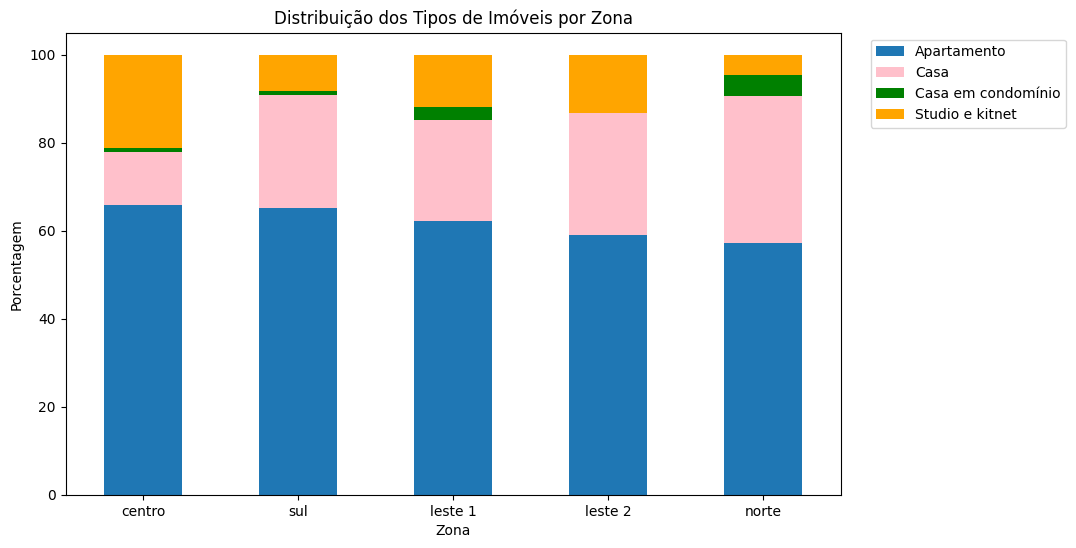

In [144]:
regions = ['centro', 'sul', 'leste 1', 'leste 2', 'norte']

# Cores para cada tipo de imóvel
cores = ['#1f77b4', 'pink', 'green', 'orange']

# Plotando o gráfico de barras empilhadas
ax = data_hipotese2.T.plot(kind='bar', stacked=True, color=cores, figsize=(10, 6))

# Definindo os rótulos dos eixos X e Y e o título do gráfico
ax.set_xlabel('Zona')
ax.set_ylabel('Porcentagem')
ax.set_title('Distribuição dos Tipos de Imóveis por Zona')

# Definindo as legendas do eixo X em formato horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrando o gráfico com a legenda fora do gráfico no canto superior direito
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
# Mostrando o gráfico
plt.show()


### Hipótese 3

Com base nas conclusões obtidas, foi constatado que o Centro Ampliado de fato apresenta uma concentração significativamente maior de apartamentos em relação aos demais tipos de imóveis. Cerca de 63.9% das unidades nessa zona são apartamentos, o que reforça a ideia de que os fatores como a localização privilegiada, infraestrutura desenvolvida, presença de bairros nobres e boêmios, e a importância do centro tecnológico e financeiro da cidade atraem uma maior demanda por esse tipo de imóvel.

 Em segundo lugar, as casas representam aproximadamente 18.8% do total de unidades no Centro Ampliado. Isso sugere que, apesar da predominância de apartamentos, ainda há uma parcela considerável de casas, provavelmente buscadas por pessoas que preferem uma residência mais espaçosa, com maior privacidade ou comodidades específicas que essas propriedades podem oferecer.

 Essa análise demonstra a importância de entender a composição e oferta de diferentes tipos de imóveis em cada zona, visto que as preferências dos compradores, a infraestrutura disponível e o perfil do mercado imobiliário podem variar significativamente em diferentes regiões.